In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import keras
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
Condition = pd.read_csv("/content/drive/MyDrive/pfe/departements/ML/DATA/condition_v2.csv")
medication = pd.read_csv("/content/drive/MyDrive/pfe/departements/ML/DATA/medication_v2.csv")
merge_df=pd.read_csv("/content/drive/MyDrive/pfe/departements/ML/DATA/Merged_Df_cm.csv")

In [ ]:
Condition

,ID,ConditionText,PatientUID,Date
0,1,Cardiac Arrest,5cbc121b-cd71-4428-b8b7-31e53eba8184,1965-11-15
1,2,History of cardiac arrest (situation),5cbc121b-cd71-4428-b8b7-31e53eba8184,1965-11-15
2,3,Body mass index 30+ - obesity (finding),5cbc121b-cd71-4428-b8b7-31e53eba8184,1977-02-21
3,4,Prediabetes,5cbc121b-cd71-4428-b8b7-31e53eba8184,1987-12-21
4,5,Anemia (disorder),5cbc121b-cd71-4428-b8b7-31e53eba8184,1987-12-21
...,...,...,...,...
8840,30,Miscarriage in first trimester,c588a992-d308-4916-aed5-3894f7e5f6e3,1991-09-19
8841,38,Streptococcal sore throat (disorder),c588a992-d308-4916-aed5-3894f7e5f6e3,2009-10-26
8842,7,Viral sinusitis (disorder),c588a992-d308-4916-aed5-3894f7e5f6e3,2014-09-14
8843,7,Viral sinusitis (disorder),c588a992-d308-4916-aed5-3894f7e5f6e3,2017-02-21


In [ ]:
medication

,ID,MedicationText,PatientUID,Date
0,1,Ibuprofen 200 MG Oral Tablet,5cbc121b-cd71-4428-b8b7-31e53eba8184,2016-05-21
1,2,Acetaminophen 325 MG Oral Tablet,adccf2c3-9dc4-4067-ba23-98982c4875da,2010-07-27
2,2,Acetaminophen 325 MG Oral Tablet,adccf2c3-9dc4-4067-ba23-98982c4875da,2012-01-26
3,3,Simvistatin 10 MG,adccf2c3-9dc4-4067-ba23-98982c4875da,2012-07-20
4,3,Simvistatin 10 MG,adccf2c3-9dc4-4067-ba23-98982c4875da,2013-07-20
...,...,...,...,...
14157,94,Warfarin Sodium 5 MG Oral Tablet,d49615b1-38b4-4c37-b59c-076636983fb7,2001-12-24
14158,95,Verapamil Hydrochloride 40 MG,d49615b1-38b4-4c37-b59c-076636983fb7,2001-12-24
14159,96,Digoxin 0.125 MG Oral Tablet,d49615b1-38b4-4c37-b59c-076636983fb7,2001-12-24
14160,28,Penicillin V Potassium 500 MG Oral Tablet,c588a992-d308-4916-aed5-3894f7e5f6e3,2009-10-26


In [ ]:
merge_df

,ID_Condition,ConditionText,PatientUID,Date,ID_Medication,MedicationText
0,8,Fracture of clavicle,5cbc121b-cd71-4428-b8b7-31e53eba8184,2016-05-21,1.0,Ibuprofen 200 MG Oral Tablet
1,9,Acute bronchitis (disorder),adccf2c3-9dc4-4067-ba23-98982c4875da,2010-07-27,2.0,Acetaminophen 325 MG Oral Tablet
2,9,Acute bronchitis (disorder),adccf2c3-9dc4-4067-ba23-98982c4875da,2012-01-26,2.0,Acetaminophen 325 MG Oral Tablet
3,12,Otitis media,31191928-6acb-4d73-931c-e601cc3a13fa,2017-10-24,5.0,Amoxicillin 500 MG Oral Tablet
4,12,Otitis media,31191928-6acb-4d73-931c-e601cc3a13fa,2017-10-24,1.0,Ibuprofen 200 MG Oral Tablet
...,...,...,...,...,...,...
3670,104,Atrial Fibrillation,d49615b1-38b4-4c37-b59c-076636983fb7,2001-12-24,94.0,Warfarin Sodium 5 MG Oral Tablet
3671,104,Atrial Fibrillation,d49615b1-38b4-4c37-b59c-076636983fb7,2001-12-24,95.0,Verapamil Hydrochloride 40 MG
3672,104,Atrial Fibrillation,d49615b1-38b4-4c37-b59c-076636983fb7,2001-12-24,96.0,Digoxin 0.125 MG Oral Tablet
3673,38,Streptococcal sore throat (disorder),c588a992-d308-4916-aed5-3894f7e5f6e3,2009-10-26,28.0,Penicillin V Potassium 500 MG Oral Tablet


# **Visaualisation**

<Axes: ylabel='ConditionText'>

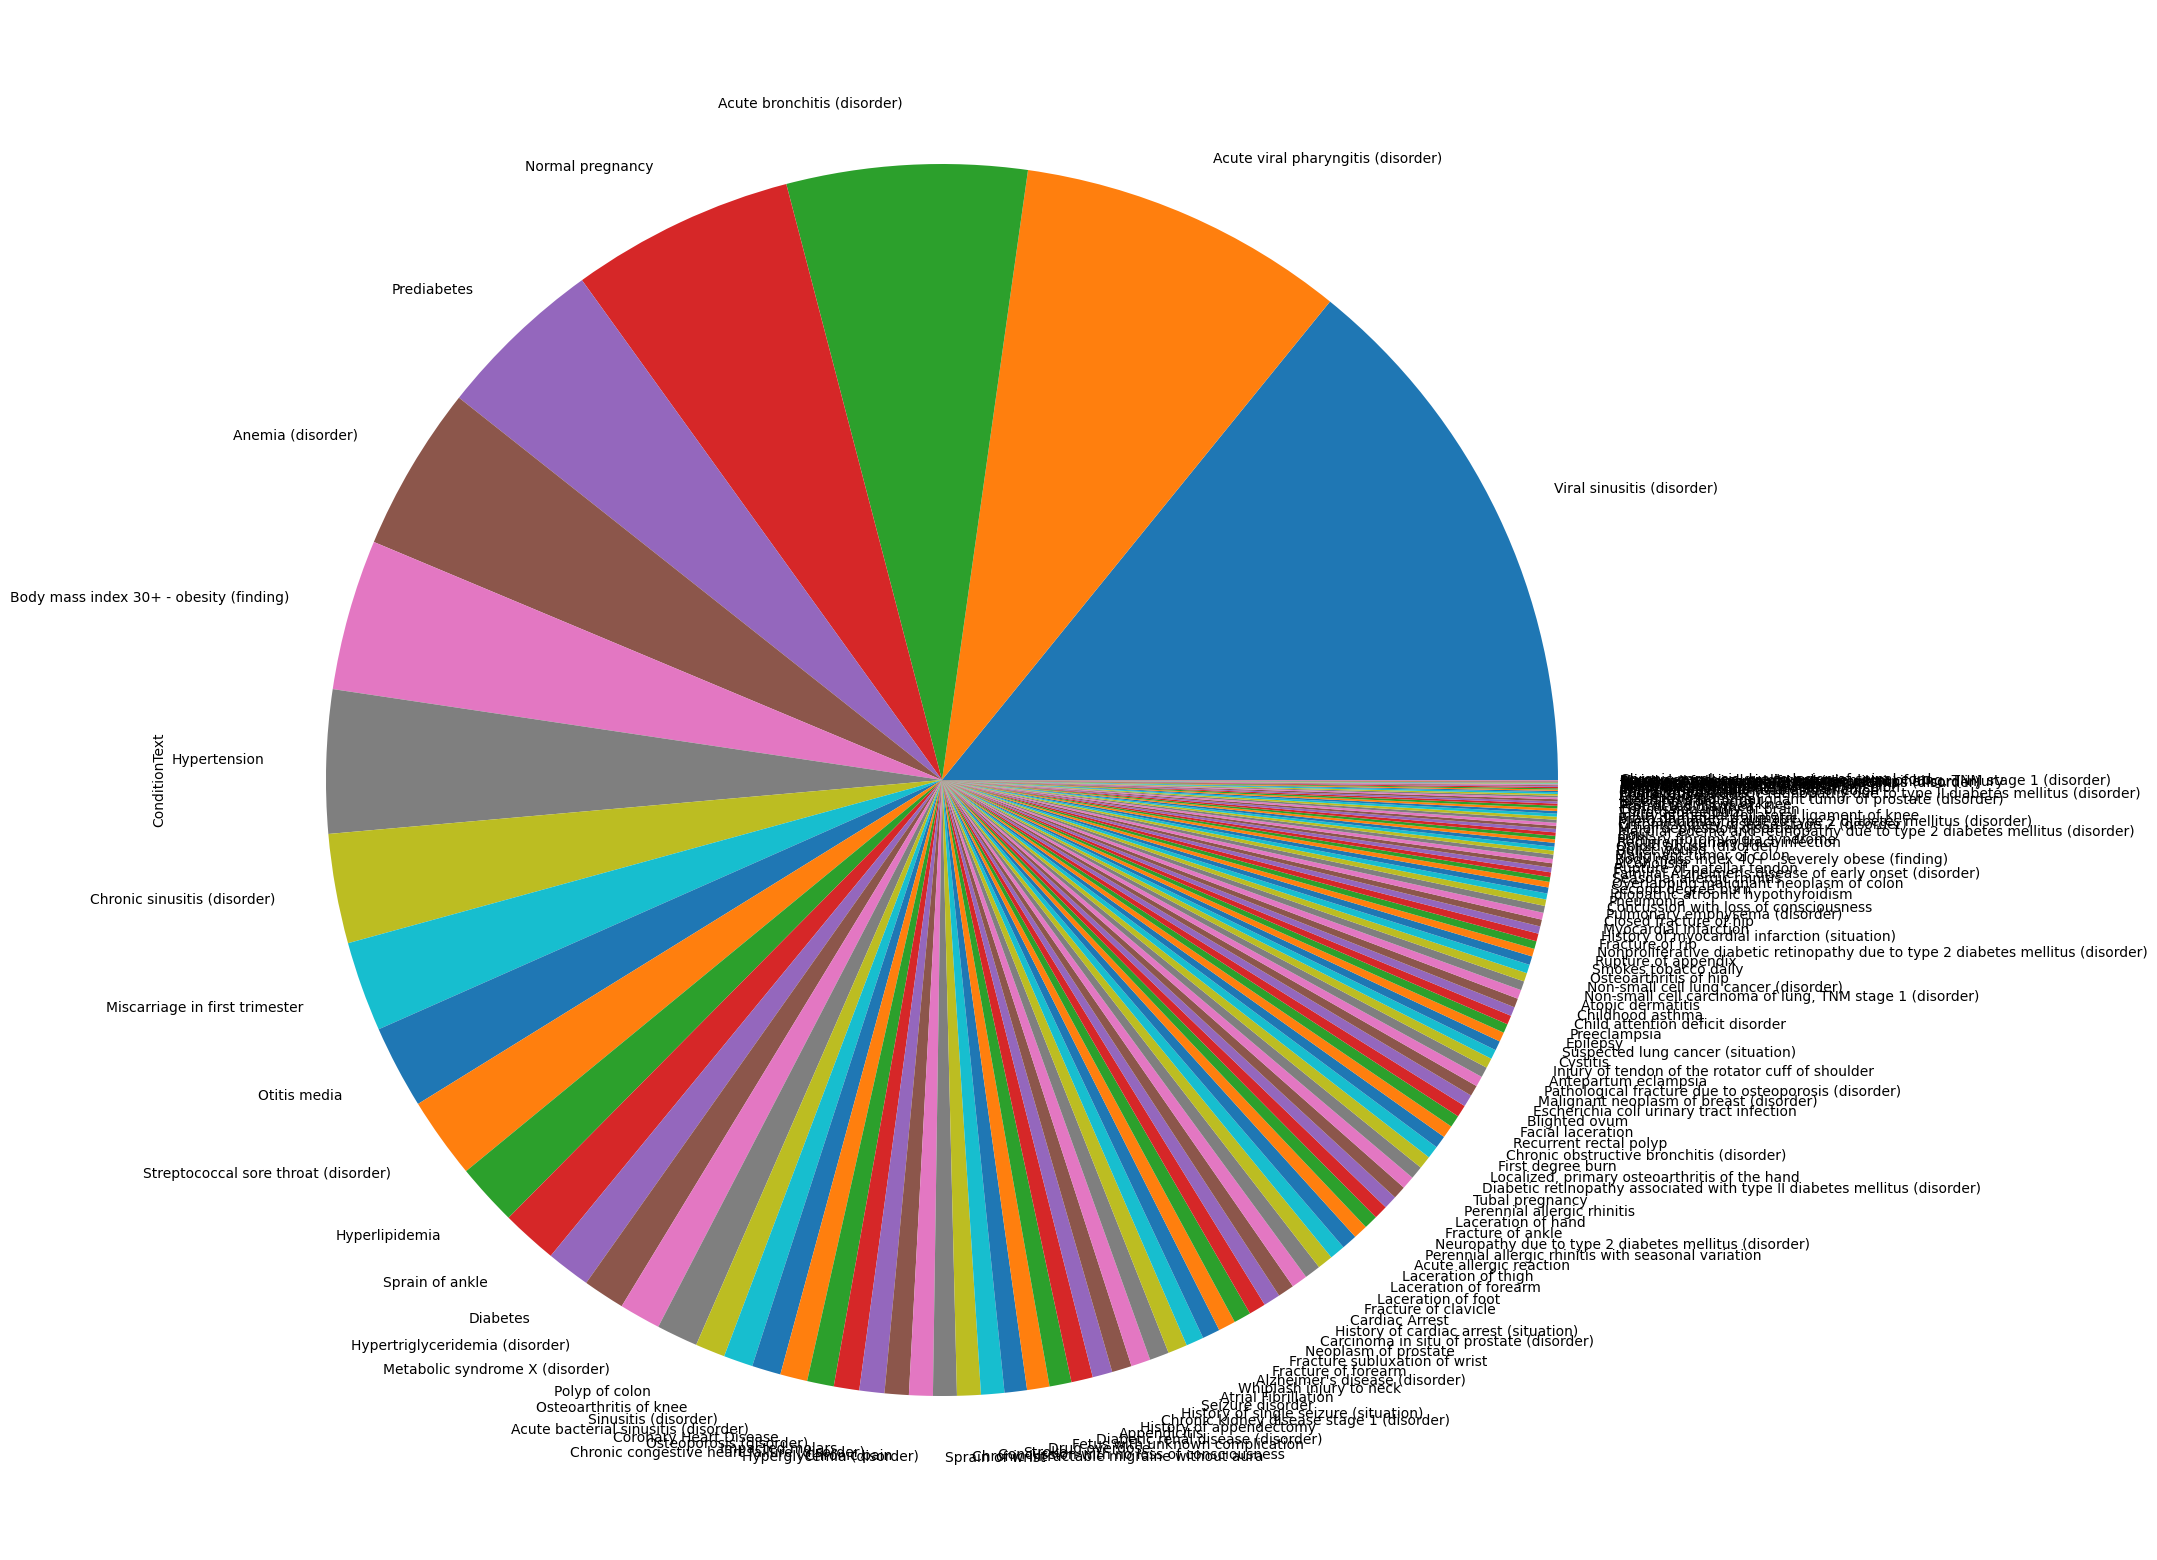

In [ ]:
#show the different medications
Condition['ConditionText'].value_counts().plot(kind='pie', figsize=(20,20))

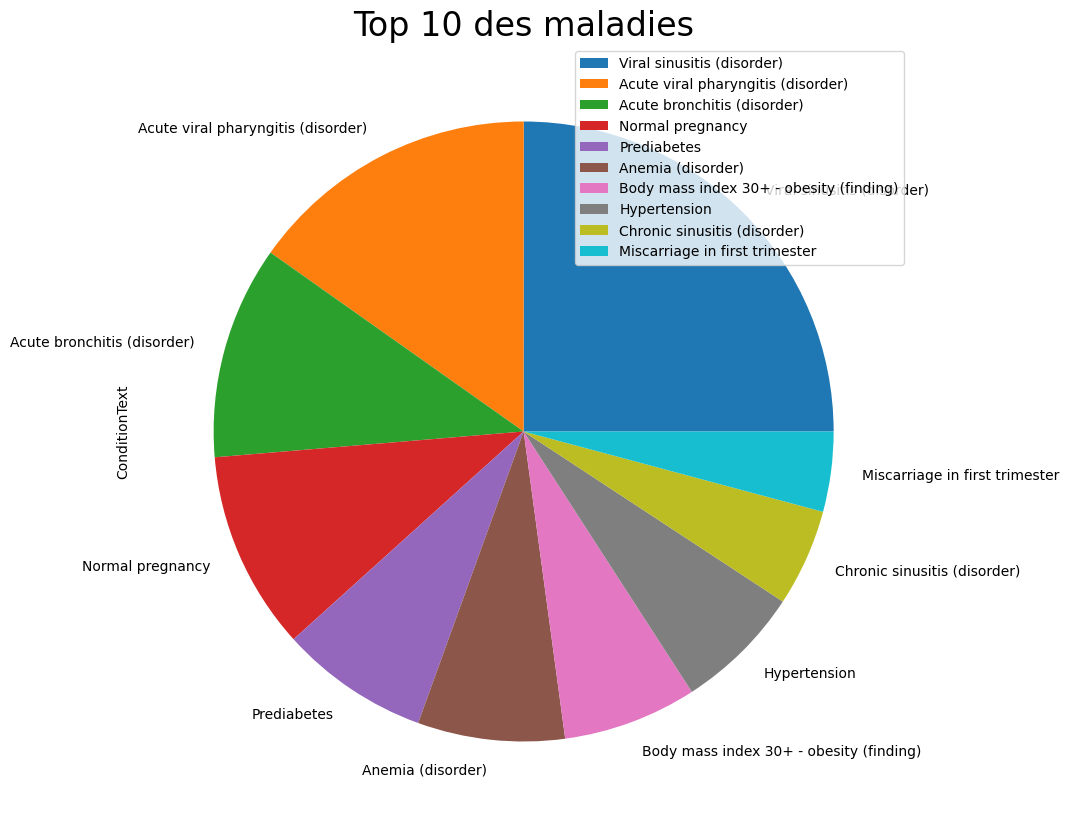

In [ ]:
# calculer les 10 premiers médicaments
top_medicaments = Condition['ConditionText'].value_counts().head(10)

# créer un graphique en camembert
fig, ax = plt.subplots(figsize=(10,100))
top_medicaments.plot(kind='pie', ax=ax)

# ajouter un titre au graphique
ax.set_title('Top 10 des maladies', fontsize=24)

# ajouter une légende
ax.legend(labels=top_medicaments.index, loc="best")

# afficher le graphique
plt.show()

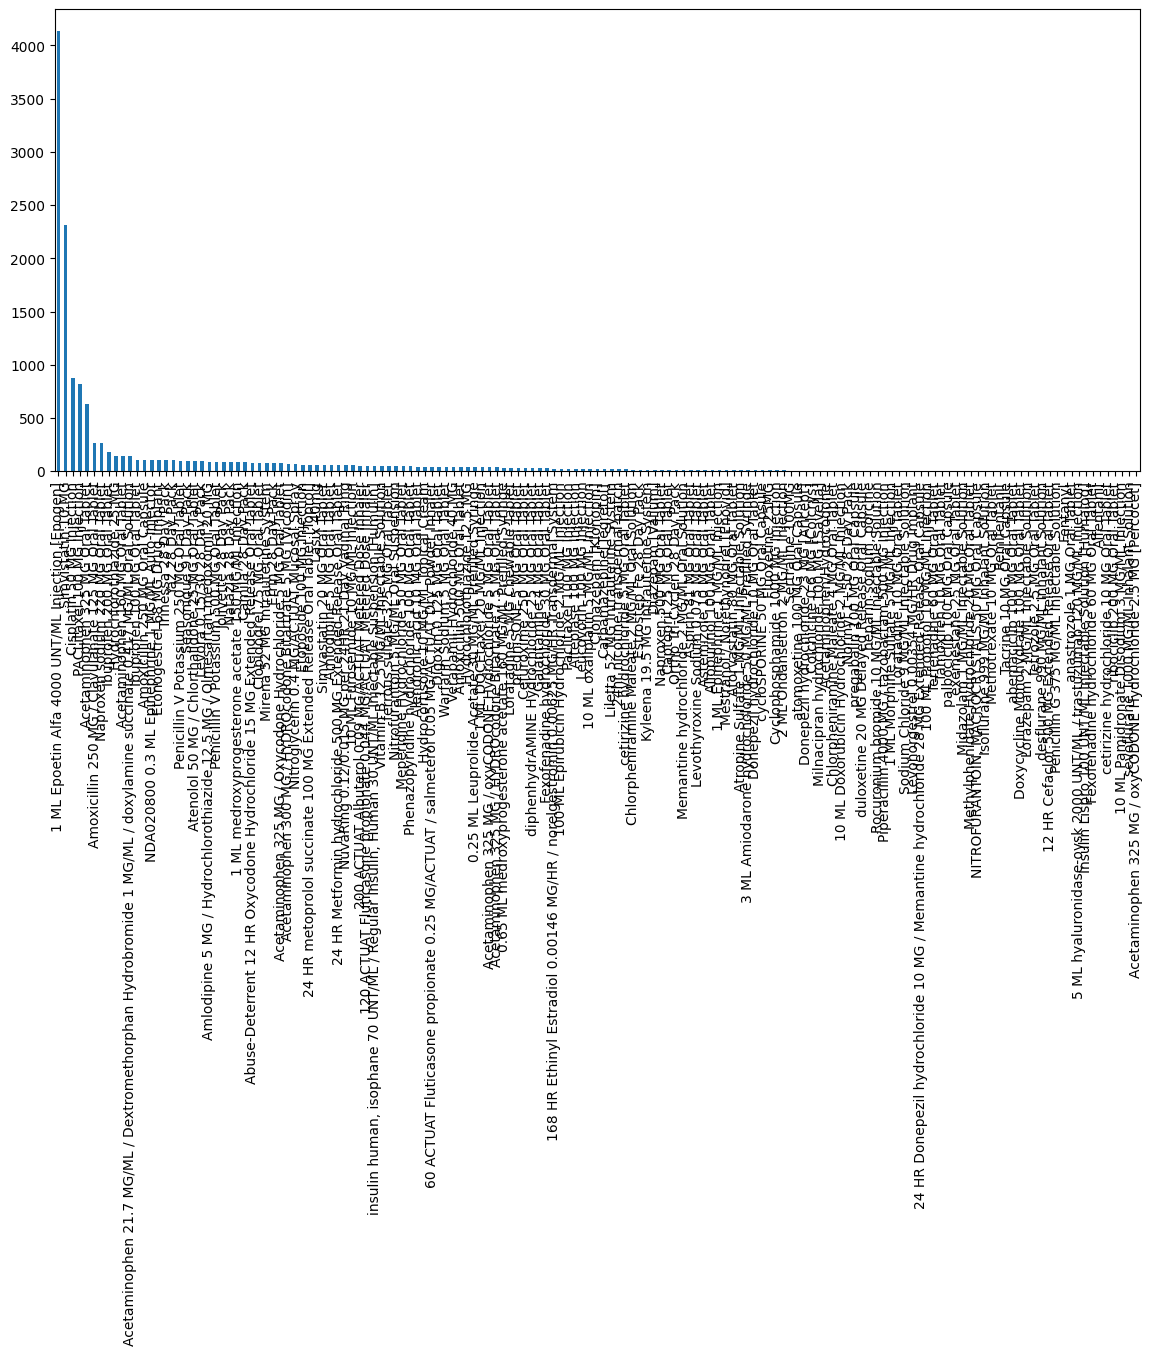

In [ ]:
#show the different medication
ax = medication['MedicationText'].value_counts().plot(kind='bar', figsize=(14,6))

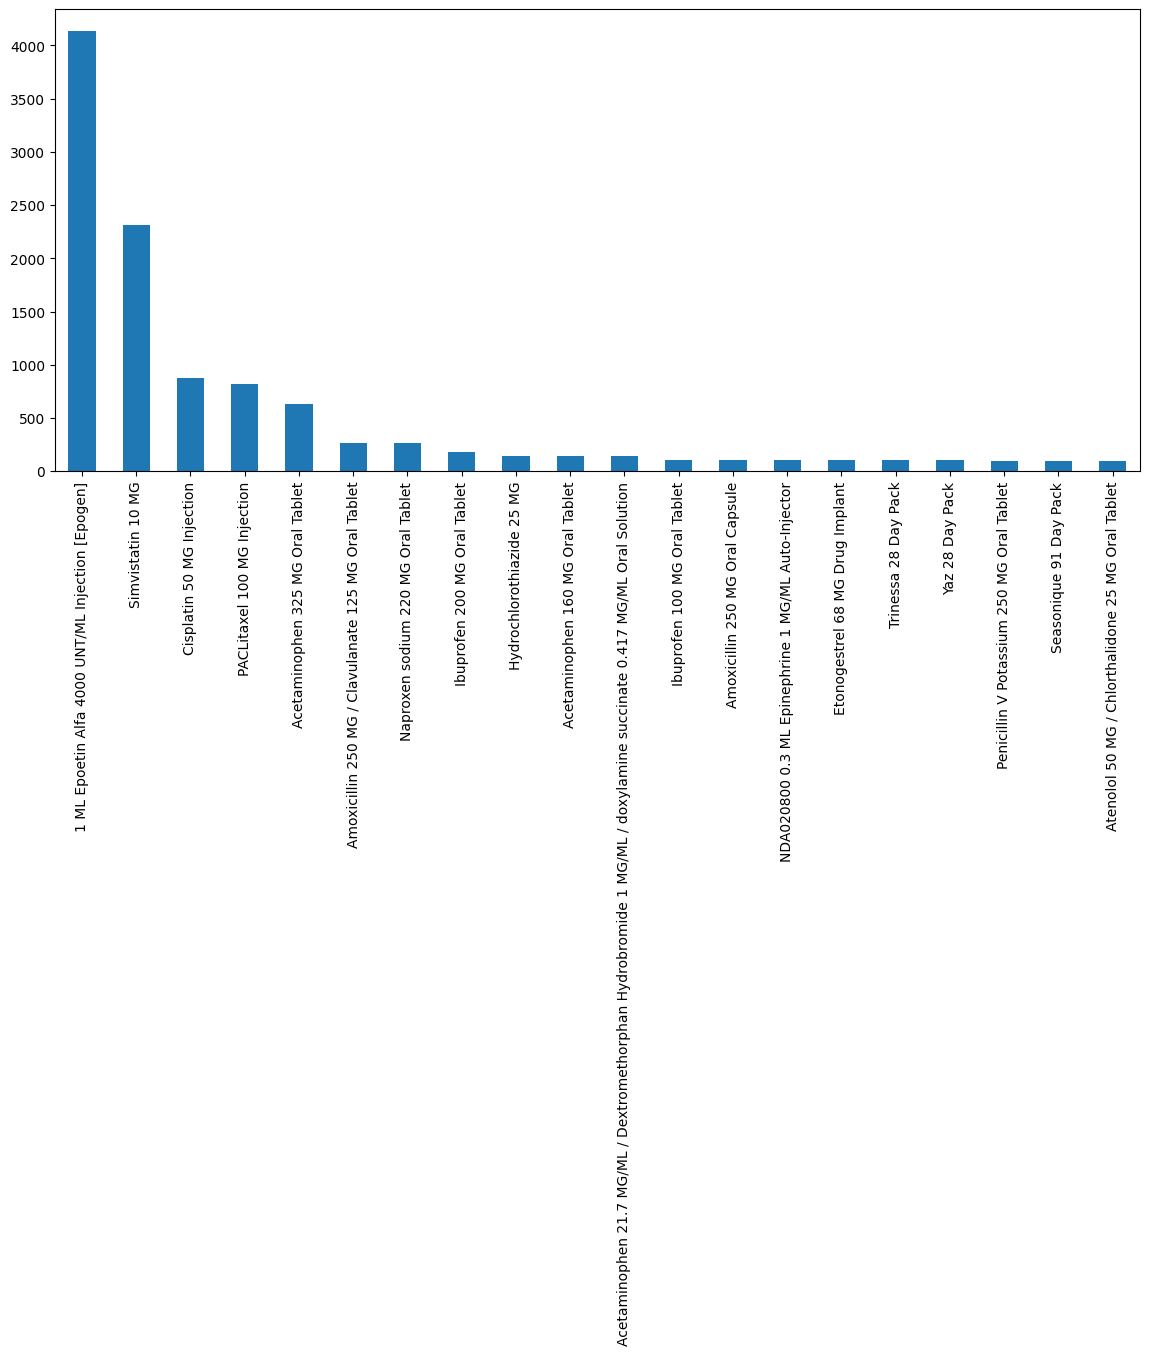

In [ ]:
ax = medication['MedicationText'].value_counts().head(20).plot(kind='bar', figsize=(14,6))

In [ ]:
import plotly.express as px

# Create a DataFrame with the count of medication for each condition
med_count = merge_df.groupby(['ConditionText', 'MedicationText']).size().reset_index(name='Count')

# Create the treemap figure
fig = px.treemap(med_count,
                 path=['ConditionText', 'MedicationText'],
                 values='Count',
                 color='ConditionText',
                 color_continuous_scale='blues',
                 width=1000,
                 height=800)
fig.show()



---



---



---



In [ ]:
merge_df['ConditionText'] = merge_df['ConditionText'].str.lower()
merge_df['MedicationText'] = merge_df['MedicationText'].str.lower()



---



---



---





# **1ér Algorithme d'assistance de médicament**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
interaction = pd.crosstab(merge_df['ConditionText'], merge_df['MedicationText'] )
interaction

MedicationText,0.25 ml leuprolide acetate 30 mg/ml prefilled syringe,1 ml docetaxel 20 mg/ml injection,1 ml epinephrine 1 mg/ml injection,1 ml epoetin alfa 4000 unt/ml injection [epogen],1 ml morphine sulfate 5 mg/ml injection,100 ml epirubicin hydrochloride 2 mg/ml injection,100 ml propofol 10 mg/ml injection,12 hr cefaclor 500 mg extended release oral tablet,120 actuat fluticasone propionate 0.044 mg/actuat metered dose inhaler,2 ml ondansetron 2 mg/ml injection,...,remifentanil,rocuronium bromide 10 mg/ml injectable solution,sevoflurane 1000 mg/ml inhalant solution,simvastatin 20 mg oral tablet,sodium chloride 9 mg/ml injectable solution,tacrine 10 mg oral capsule,trinessa 28 day pack,verapamil hydrochloride 40 mg,vitamin b 12 5 mg/ml injectable solution,warfarin sodium 5 mg oral tablet
ConditionText,,,,,,,,,,,,,,,,,,,,,
acute allergic reaction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
acute bacterial sinusitis (disorder),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
acute bronchitis (disorder),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
acute cholecystitis,0,0,0,0,4,0,4,0,0,4,...,2,4,1,0,4,0,0,0,0,0
acute viral pharyngitis (disorder),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
stroke,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tear of meniscus of knee,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
third degree burn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
interaction.fillna(0, inplace=True)


In [ ]:
# réinitialiser l'index de interaction_matrix
interaction_matrix = interaction.reset_index(drop=True)




---


**Calcul de la similarité**


---
 calculer la similarité entre chaque paire d'encounters en utilisant une mesure de similarité, comme la similarité cosinus ou la corrélation de Pearson. La similarité entre deux encounters est déterminée par la quantité de médicaments qu'ils ont en commun, ainsi que leur fréquence relative dans la matrice d'interaction. Plus la similarité entre deux encounters est élevée, plus ils sont susceptibles de partager des préférences en matière de médicaments.


In [ ]:
similarity_matrix = cosine_similarity(interaction_matrix)

In [ ]:
similarity=cosine_similarity(interaction)

In [ ]:
k = 2
similar_input = {}
for i, condition in enumerate(interaction.index):
    # Trouver les indices des K voisins les plus similaires à cet encounter
    similar_indices = similarity[i].argsort()[-k-1:-1][::-1]
    # Enregistrer les encounters similaires dans un dictionnaire
    similar_input[condition] = list(interaction.index[similar_indices])
similar_input

{'acute allergic reaction': ['fracture of ankle', 'coronary heart disease'],
 'acute bacterial sinusitis (disorder)': ['sinusitis (disorder)',
  'viral sinusitis (disorder)'],
 'acute bronchitis (disorder)': ['injury of medial collateral ligament of knee',
  'rupture of patellar tendon'],
 'acute cholecystitis': ['acute cholecystitis',
  'chronic intractable migraine without aura'],
 'acute viral pharyngitis (disorder)': ['streptococcal sore throat (disorder)',
  'whiplash injury to neck'],
 "alzheimer's disease (disorder)": ["familial alzheimer's disease of early onset (disorder)",
  'osteoporosis (disorder)'],
 'anemia (disorder)': ['prediabetes', 'normal pregnancy'],
 'asthma': ['perennial allergic rhinitis',
  'perennial allergic rhinitis with seasonal variation'],
 'atrial fibrillation': ['hyperlipidemia', 'fracture of ankle'],
 'blindness due to type 2 diabetes mellitus (disorder)': ['smokes tobacco daily',
  'diabetic retinopathy associated with type ii diabetes mellitus (disord

In [ ]:
k = 2
similar_conditions = {}
for i, condition in enumerate(interaction_matrix.index):
    # Trouver les indices des K voisins les plus similaires à cet encounter
    similar_indices = similarity_matrix[i].argsort()[-k-1:-1][::-1]
    # Enregistrer les encounters similaires dans un dictionnaire
    similar_conditions[condition] = list(interaction_matrix.index[similar_indices])

similar_conditions

{0: [31, 23],
 1: [77, 85],
 2: [47, 74],
 3: [3, 17],
 4: [81, 86],
 5: [29, 65],
 6: [70, 62],
 7: [68, 69],
 8: [41, 31],
 9: [78, 26],
 10: [23, 42],
 11: [67, 22],
 12: [12, 86],
 13: [13, 86],
 14: [86, 21],
 15: [68, 69],
 16: [3, 17],
 17: [75, 34],
 18: [25, 9],
 19: [56, 59],
 20: [23, 10],
 21: [86, 31],
 22: [32, 67],
 23: [20, 10],
 24: [18, 25],
 25: [18, 9],
 26: [78, 26],
 27: [39, 76],
 28: [49, 30],
 29: [5, 65],
 30: [49, 28],
 31: [35, 67],
 32: [22, 67],
 33: [50, 79],
 34: [35, 51],
 35: [31, 80],
 36: [71, 73],
 37: [13, 86],
 38: [57, 82],
 39: [76, 27],
 40: [19, 56],
 41: [8, 40],
 42: [10, 24],
 43: [55, 59],
 44: [86, 31],
 45: [86, 31],
 46: [83, 50],
 47: [2, 74],
 48: [51, 49],
 49: [30, 28],
 50: [33, 28],
 51: [48, 80],
 52: [64, 52],
 53: [54, 41],
 54: [54, 41],
 55: [43, 59],
 56: [56, 59],
 57: [57, 82],
 58: [12, 86],
 59: [43, 56],
 60: [72, 86],
 61: [78, 26],
 62: [6, 70],
 63: [64, 52],
 64: [64, 52],
 65: [11, 5],
 66: [35, 33],
 67: [22, 11],

### **Recommender**

In [ ]:
def inter_recommend_medications(input_disease):
    similar_conditions_rec = similar_input[input_disease]
    prescribed_medications = []
    for neighbor in similar_conditions_rec:
        neighbor_medication_df = merge_df.loc[merge_df['ConditionText'] == neighbor, 'MedicationText']
        prescribed_medications += list(neighbor_medication_df)
    return prescribed_medications

# **2 ème algorithme d'assistance**
Ce algorithme tend à utiliser CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorized = vectorizer.fit_transform(merge_df['ConditionText'])

In [ ]:
V_similarities = cosine_similarity(vectorized)

In [ ]:
V_similarities

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 1.        , ..., 0.        , 0.28867513,
        0.33333333],
       [0.        , 1.        , 1.        , ..., 0.        , 0.28867513,
        0.33333333],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.28867513, 0.28867513, ..., 0.        , 1.        ,
        0.28867513],
       [0.        , 0.33333333, 0.33333333, ..., 0.        , 0.28867513,
        1.        ]])

In [ ]:
df = pd.DataFrame(V_similarities, columns=merge_df['MedicationText'], index=merge_df['ConditionText']).reset_index()
df

MedicationText,ConditionText,ibuprofen 200 mg oral tablet,acetaminophen 325 mg oral tablet,acetaminophen 325 mg oral tablet,amoxicillin 500 mg oral tablet,ibuprofen 200 mg oral tablet,acetaminophen 325 mg oral tablet,acetaminophen 325 mg oral tablet,amoxicillin 250 mg / clavulanate 125 mg oral tablet,amoxicillin 500 mg oral tablet,...,ibuprofen 100 mg oral tablet,penicillin v potassium 250 mg oral tablet,acetaminophen 325 mg oral tablet,naproxen sodium 220 mg oral tablet,naproxen sodium 220 mg oral tablet,warfarin sodium 5 mg oral tablet,verapamil hydrochloride 40 mg,digoxin 0.125 mg oral tablet,penicillin v potassium 500 mg oral tablet,amoxicillin 250 mg / clavulanate 125 mg oral tablet
0,fracture of clavicle,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.666667,0.235702,0.0,0.0,0.0,0.000000,0.000000
1,acute bronchitis (disorder),0.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000,0.333333,0.0,...,0.0,0.288675,1.000000,0.000000,0.235702,0.0,0.0,0.0,0.288675,0.333333
2,acute bronchitis (disorder),0.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000,0.333333,0.0,...,0.0,0.288675,1.000000,0.000000,0.235702,0.0,0.0,0.0,0.288675,0.333333
3,otitis media,0.0,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,1.0,...,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
4,otitis media,0.0,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,1.0,...,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3670,atrial fibrillation,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.000000,0.000000
3671,atrial fibrillation,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.000000,0.000000
3672,atrial fibrillation,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.000000,0.000000
3673,streptococcal sore throat (disorder),0.0,0.288675,0.288675,0.0,0.0,0.288675,0.288675,0.288675,0.0,...,0.0,1.000000,0.288675,0.000000,0.204124,0.0,0.0,0.0,1.000000,0.288675


## Recommender

In [ ]:
def Vec_recommend_medications(input_disease, num_recommendations=10):
    # Trouver l'index de la maladie d'entrée
    input_disease = input_disease.lower()
    idx = merge_df[merge_df['ConditionText'] == input_disease].index[0]

    # Extraire les indices des médicaments à recommander
    medication_indices = V_similarities[idx].argsort()[:-num_recommendations-1:-1]

    # Extraire les noms des médicaments correspondants
    recommendations = merge_df.iloc[medication_indices]['MedicationText'].tolist()

    return recommendations

# **Evaluation**

In [ ]:
input_disease = 'fracture of clavicle'

## Tester avec le 1er algorithme

In [ ]:
recommendations_1 = inter_recommend_medications(input_disease)
print(set(recommendations_1))

{'acetaminophen 325 mg oral tablet', 'acetaminophen 325 mg / oxycodone hydrochloride 5 mg oral tablet', 'ibuprofen 200 mg oral tablet', 'acetaminophen 160 mg oral tablet', 'acetaminophen 325 mg / hydrocodone bitartrate 7.5 mg oral tablet', 'naproxen sodium 220 mg oral tablet', 'meperidine hydrochloride 50 mg oral tablet'}


## Tester avec le 2ème Algorithme

In [ ]:
recommendations_2 = Vec_recommend_medications(input_disease, num_recommendations=5)
print(set(recommendations_2))

{'acetaminophen 160 mg oral tablet', 'ibuprofen 200 mg oral tablet', 'meperidine hydrochloride 50 mg oral tablet'}


## **KMEANS**
Nous allons tester le nombre de groupement


In [ ]:
from sklearn.cluster import KMeans


In [ ]:
features = interaction_matrix.transpose()
features

In [ ]:
# réduire la dimensionnalité avec PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)


**Step-2: Finding the optimal number of clusters using the elbow method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

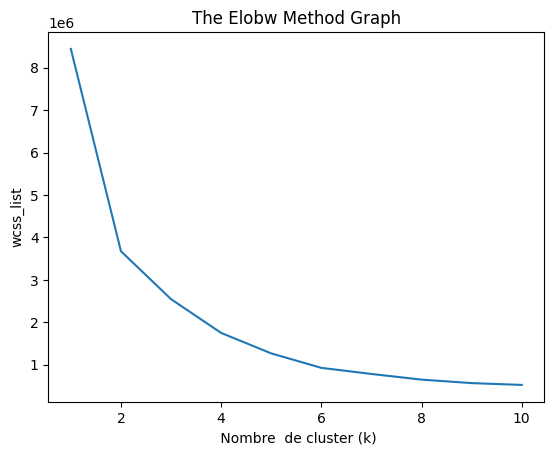

In [ ]:
#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel(' Nombre  de cluster (k)')
plt.ylabel('wcss_list')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Initialiser une liste pour stocker les scores de silhouette pour différents nombres de clusters
silhouette_scores = []

# Tester différents nombres de clusters
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

# Trouver le nombre optimal de clusters en utilisant le coefficient de silhouette
optimal_n_clusters = np.argmax(silhouette_scores) + 2

# Afficher le nombre optimal de clusters
print("Optimal number of clusters =", optimal_n_clusters)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 2 The average silhouette_score is : 0.5495017898884694


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 3 The average silhouette_score is : 0.4983270314293526


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 4 The average silhouette_score is : 0.5180499650491444


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 5 The average silhouette_score is : 0.5349729636898178


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 6 The average silhouette_score is : 0.5142690811521792


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 7 The average silhouette_score is : 0.5264872308988012


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 8 The average silhouette_score is : 0.5281833247264703


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 9 The average silhouette_score is : 0.535236478122429


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 10 The average silhouette_score is : 0.5196105842663938
Optimal number of clusters = 2




---


Les deux fonctions proposent 2 comme nombre de cluster. Allons faire quelques graphique afin de savoir qu'il s'adapte avec notre besoin


---



In [ ]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=2, n_samples=20000, random_state=0, cluster_std=0.5)
print(X[:100],y[:100])

[[ 2.56680104e+00  9.71841385e-01]
 [ 1.50879331e+00  4.05801162e+00]
 [ 6.75791589e-01  4.65702313e+00]
 [ 2.70535338e+00  6.86343425e-01]
 [ 1.03995616e+00  4.02203991e+00]
 [ 7.73299215e-01  4.66597158e+00]
 [ 1.43555709e+00  3.43706972e-01]
 [ 1.99643923e+00  5.43045554e-01]
 [ 5.21888456e-01  4.09162852e+00]
 [ 6.16138733e-01  4.34022841e+00]
 [ 1.10394428e+00  4.58418446e+00]
 [ 2.16132665e+00  1.35702358e+00]
 [ 1.36726156e+00  3.54599475e+00]
 [ 1.22314097e+00  4.24573536e+00]
 [ 1.10382179e+00  3.43287282e+00]
 [ 2.00758509e+00  9.78431365e-01]
 [ 1.70033828e+00  2.32515804e-01]
 [ 8.64762984e-01  3.92554686e+00]
 [ 1.67114710e+00  5.68164314e-01]
 [ 1.91738925e+00  7.08839925e-01]
 [ 1.81039835e-01  3.91918146e+00]
 [ 9.66358211e-01  4.86401061e+00]
 [ 5.91691933e-01  4.01492074e+00]
 [ 2.51088962e+00  6.55914914e-01]
 [ 8.43001336e-01  4.01955691e+00]
 [ 1.83435467e+00  1.08374846e+00]
 [ 3.12559327e-01  4.35547055e+00]
 [ 4.82514401e-01  3.63675276e+00]
 [ 8.97791985e-01  3

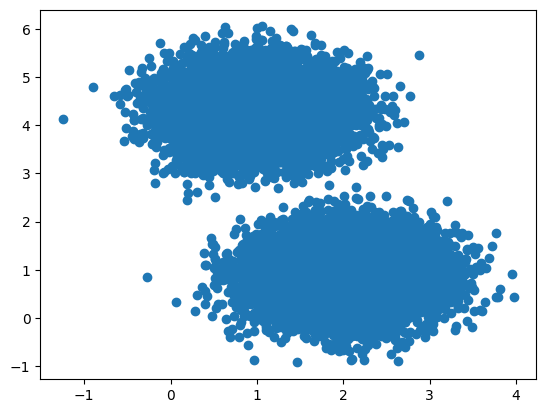

In [ ]:
plt.scatter(X[:,0],X[:,1]);

In [ ]:
#Here, we are assuming the value of k as 5
kmeans = KMeans(n_clusters=2)#Creating a K-Means Object
kmeans.fit(df)#Fitting the Model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2)

**On va visualiser les clusters**

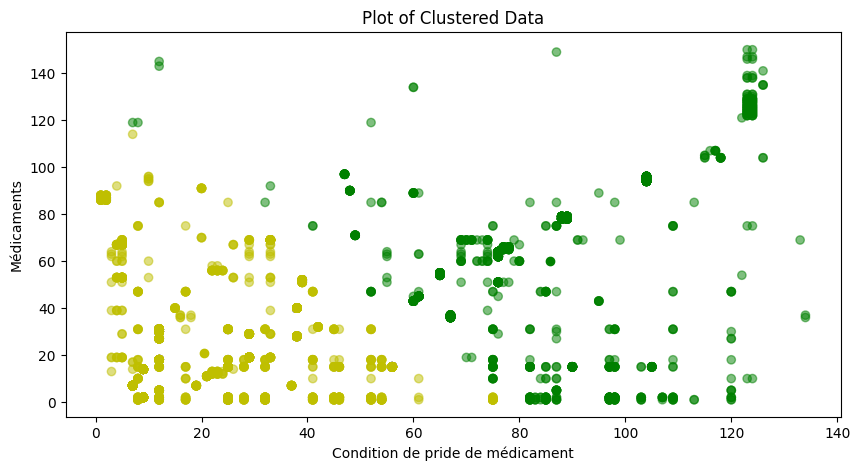

In [ ]:
plt.figure(figsize=(10, 5))
colmap = {1:'y',2:'g',3:'b',4:'r',5:'c'}
colors = map(lambda x: colmap[x+1], labels)
print(colors)
colors1=list(colors)

plt.scatter(merge_df["ID_Condition"],merge_df["ID_Medication"], color=colors1, alpha=0.5)
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlabel('Condition de pride de médicament')
plt.ylabel('Médicaments')
plt.title('Plot of Clustered Data')
plt.show()